#### Import required libraries 

In [2]:
import pandas as pd
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler 

from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt     


from tensorflow import keras
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler 
# import plotly.graph_objects as go


# from sklearn.ensemble import IsolationForest  

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed 
import seaborn as sns #visualisation


In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV  

#### Read the dataset 
- data normal 

In [46]:
# import data set from the local driver 
dff=pd.read_csv('SWaT_Dataset_Normal_v0.csv')#, parse_dates = ['Timestamp'], index_col = 'Timestamp') 
dff.head() 


,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,22/12/2015 4:00:00 PM,2.470294,261.5804,2,2,1,244.3284,8.19008,306.101,2.471278,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
1,22/12/2015 4:00:01 PM,2.457163,261.1879,2,2,1,244.3284,8.19008,306.101,2.468587,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
2,22/12/2015 4:00:02 PM,2.439548,260.9131,2,2,1,244.3284,8.19008,306.101,2.467305,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
3,22/12/2015 4:00:03 PM,2.428338,260.2850,2,2,1,244.3284,8.19008,306.101,2.466536,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
4,22/12/2015 4:00:04 PM,2.424815,259.8925,2,2,1,244.4245,8.19008,306.101,2.466536,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal


In [48]:
# # convert timestamp to DateTime 
dff['Timestamp'] = pd.to_datetime(dff['Timestamp']) 
dff.head()

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,2015-12-22 16:00:00,2.470294,261.5804,2,2,1,244.3284,8.19008,306.101,2.471278,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
1,2015-12-22 16:00:01,2.457163,261.1879,2,2,1,244.3284,8.19008,306.101,2.468587,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
2,2015-12-22 16:00:02,2.439548,260.9131,2,2,1,244.3284,8.19008,306.101,2.467305,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
3,2015-12-22 16:00:03,2.428338,260.2850,2,2,1,244.3284,8.19008,306.101,2.466536,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
4,2015-12-22 16:00:04,2.424815,259.8925,2,2,1,244.4245,8.19008,306.101,2.466536,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal


In [49]:
# remove the space on Normal/Attack columns 
dff['Normal/Attack'] = dff['Normal/Attack'].str.replace(' ', '')  
#To see how the data is spread betwen Attack and Normal 
print(dff.groupby('Normal/Attack')['Normal/Attack'].count())  
# Rename the col name Normal/Attack with A   
dff.rename(columns = {'Normal/Attack':'A'}, inplace = True)
dff.head(2)  

Normal/Attack
Normal    496800
Name: Normal/Attack, dtype: int64


,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,A
0,2015-12-22 16:00:00,2.470294,261.5804,2,2,1,244.3284,8.19008,306.101,2.471278,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
1,2015-12-22 16:00:01,2.457163,261.1879,2,2,1,244.3284,8.19008,306.101,2.468587,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal


In [50]:
# Convert non-numeric class to numeric

dff.A[dff.A== 'Normal'] = 0 
dff.A[dff.A == 'Attack'] = 1    
dff.head()

/tmp/ipykernel_2075565/3953137531.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff.A[dff.A== 'Normal'] = 0
/tmp/ipykernel_2075565/3953137531.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff.A[dff.A == 'Attack'] = 1


,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,A
0,2015-12-22 16:00:00,2.470294,261.5804,2,2,1,244.3284,8.19008,306.101,2.471278,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0
1,2015-12-22 16:00:01,2.457163,261.1879,2,2,1,244.3284,8.19008,306.101,2.468587,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0
2,2015-12-22 16:00:02,2.439548,260.9131,2,2,1,244.3284,8.19008,306.101,2.467305,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0
3,2015-12-22 16:00:03,2.428338,260.2850,2,2,1,244.3284,8.19008,306.101,2.466536,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0
4,2015-12-22 16:00:04,2.424815,259.8925,2,2,1,244.4245,8.19008,306.101,2.466536,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0


In [51]:
# make the class as float 
dff['A'] = dff['A'].astype('float')  

In [52]:
# a Timestamp as index 
dff= dff.set_index('Timestamp') 
dff.head() 

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,A
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-22 16:00:00,2.470294,261.5804,2,2,1,244.3284,8.19008,306.101,2.471278,2,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0.0
2015-12-22 16:00:01,2.457163,261.1879,2,2,1,244.3284,8.19008,306.101,2.468587,2,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0.0
2015-12-22 16:00:02,2.439548,260.9131,2,2,1,244.3284,8.19008,306.101,2.467305,2,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0.0
2015-12-22 16:00:03,2.428338,260.2850,2,2,1,244.3284,8.19008,306.101,2.466536,2,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0.0
2015-12-22 16:00:04,2.424815,259.8925,2,2,1,244.4245,8.19008,306.101,2.466536,2,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0.0


In [54]:
dff.shape 

(496800, 52)

None


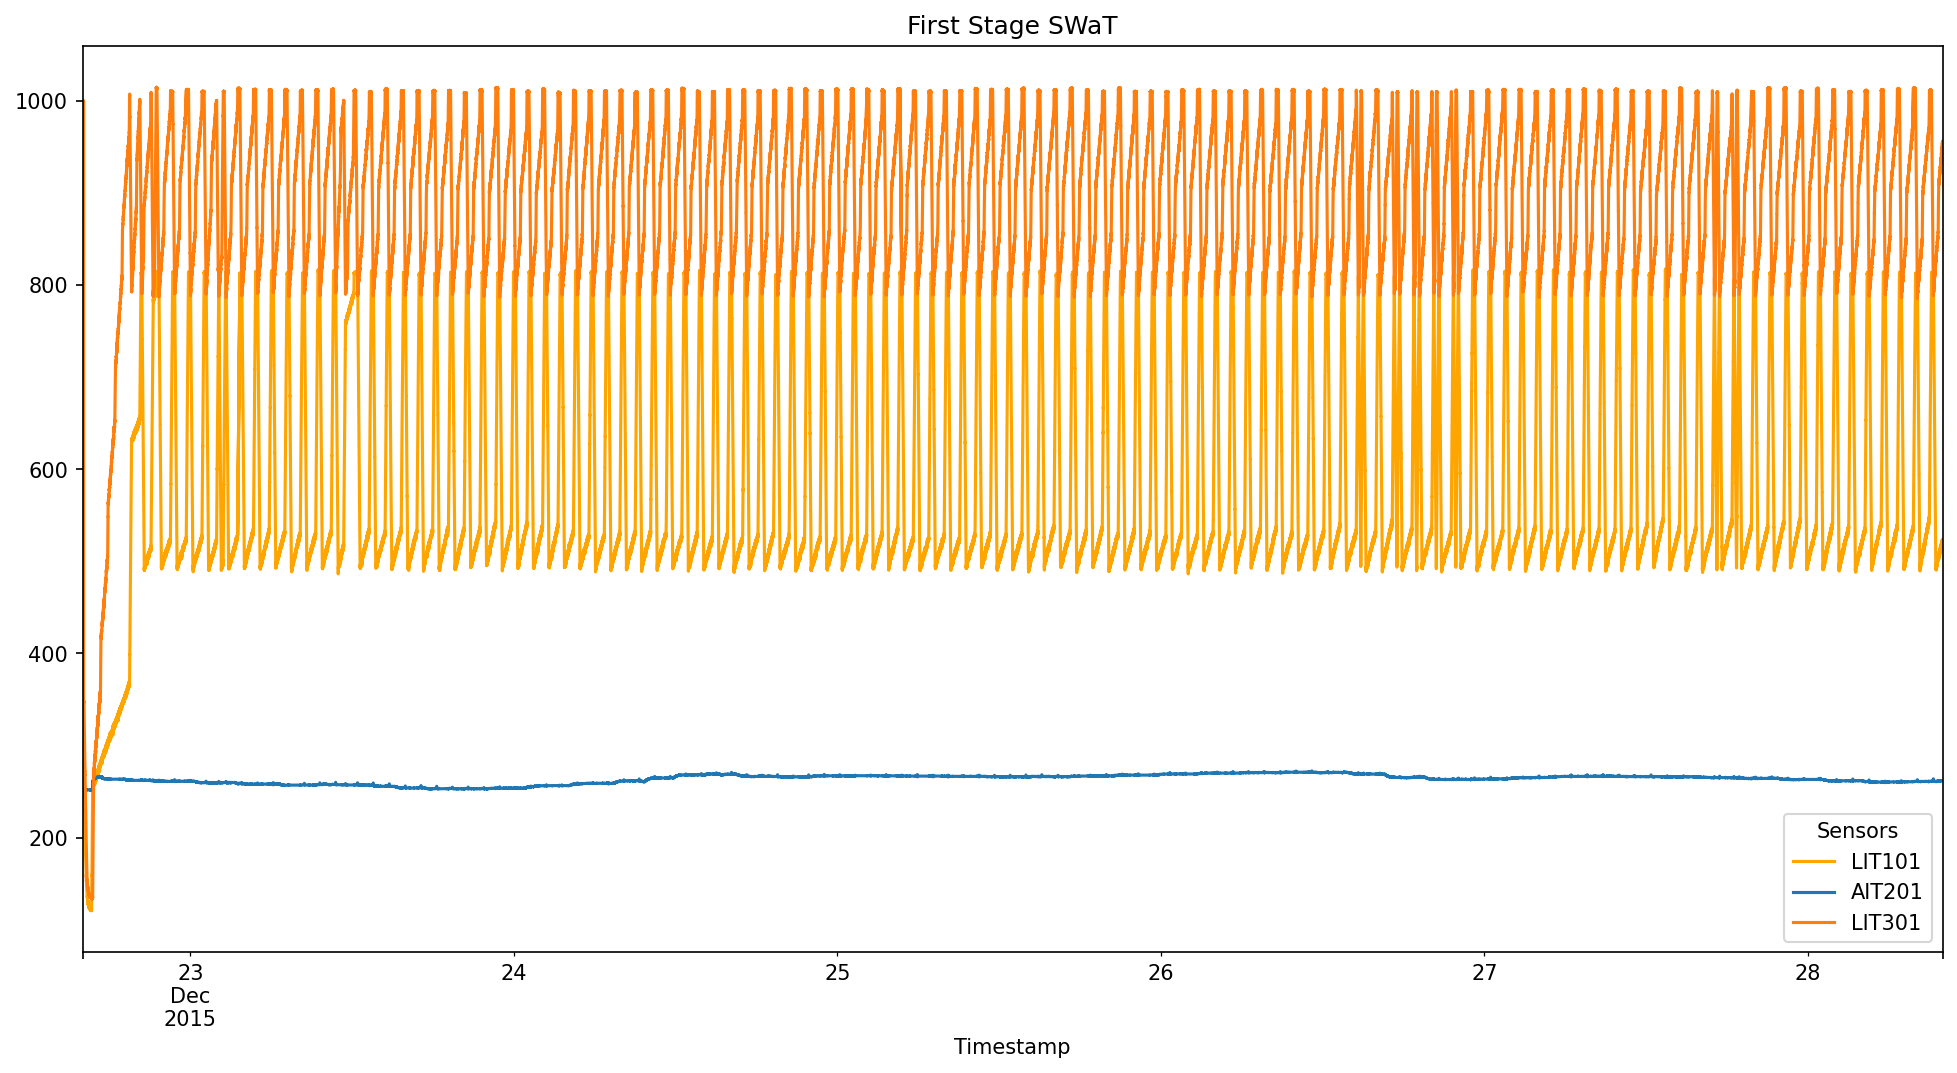

In [55]:
# Plotting the three sensors' SWaT data in its first stage

def plot (): 
    plt.figure(figsize=(16, 8), dpi=150) 
    dff['LIT101'].plot(label='LIT101', color='orange') 
    dff['AIT201'].plot(label='AIT201')
    dff['LIT301'].plot(label='LIT301') 
    plt.title('First Stage SWaT') 
    # adding Label to the x-axis 
    plt.xlabel('Timestamp') 
    # adding legend to the curve 
    plt.legend(title='Sensors')
    
print (plot ()) 

#### Exploratory Data Analysis

In [56]:
#If there are missing entries, drop them.
dff.dropna(inplace=True)#,axis=1)  
# Total number of rows and columns 
dff.shape 

(496800, 52)

In [57]:
# Dropping the duplicates 
dff= dff.drop_duplicates()
dff.head(2)   

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,A
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-22 16:00:00,2.470294,261.5804,2,2,1,244.3284,8.19008,306.101,2.471278,2,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0.0
2015-12-22 16:00:01,2.457163,261.1879,2,2,1,244.3284,8.19008,306.101,2.468587,2,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0.0


In [58]:
# Counting the number of rows after removing duplicates.
dff.shape 
 

(487101, 52)

In [59]:
# looking the distribution of the data between attack and normal

print(dff.groupby('A')['A'].count())  

A
0.0    487101
Name: A, dtype: int64


#### Visualize the dataset 
-  Plotting the number of normal and Attack transactions in the dataset. 

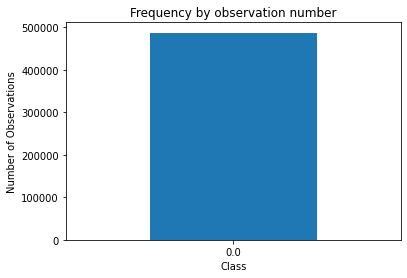

In [60]:
#Visualizing the imbalanced dataset
count_classes = pd.value_counts(dff['A'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(len(dff['A'].unique())))#, df1.A.unique()))
plt.title("Frequency by observation number")
plt.xlabel("Class") 
plt.ylabel("Number of Observations");  

In [61]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 487101 entries, 2015-12-22 16:00:00 to 2015-12-28 09:59:59
Data columns (total 52 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   FIT101   487101 non-null  float64
 1   LIT101   487101 non-null  float64
 2   MV101    487101 non-null  int64  
 3   P101     487101 non-null  int64  
 4   P102     487101 non-null  int64  
 5   AIT201   487101 non-null  float64
 6   AIT202   487101 non-null  float64
 7   AIT203   487101 non-null  float64
 8   FIT201   487101 non-null  float64
 9   MV201    487101 non-null  int64  
 10  P201     487101 non-null  int64  
 11  P202     487101 non-null  int64  
 12  P203     487101 non-null  int64  
 13  P204     487101 non-null  int64  
 14  P205     487101 non-null  int64  
 15  P206     487101 non-null  int64  
 16  DPIT301  487101 non-null  float64
 17  FIT301   487101 non-null  float64
 18  LIT301   487101 non-null  float64
 19  MV301    487101 non-null  int64

#### Normalize using min Max scaler  

In [62]:
# build the scaler model 
# from sklearn.preprocessing import MinMaxScaler 

con_feats = ['FIT101','LIT101','AIT201','AIT202','AIT203','FIT201','DPIT301','FIT301','FIT301','LIT301','AIT401',
            'AIT402','FIT401','LIT401','AIT501','AIT502','AIT503','AIT504','FIT501','FIT502','FIT503','FIT504',
            'PIT501','PIT502','PIT503','FIT601'] 
scaler = MinMaxScaler() 
dff[con_feats] = scaler.fit_transform(dff[con_feats])
dff.head()  

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,A
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-22 16:00:00,0.899895,0.160292,2,2,1,0.000000,0.0,0.01971,0.993304,2,...,1,1,0.004448,0.0,0.005921,0.000147,1,1,1,0.0
2015-12-22 16:00:01,0.895111,0.159845,2,2,1,0.000000,0.0,0.01971,0.992222,2,...,1,1,0.004448,0.0,0.005921,0.000147,1,1,1,0.0
2015-12-22 16:00:02,0.888694,0.159533,2,2,1,0.000000,0.0,0.01971,0.991707,2,...,1,1,0.004448,0.0,0.005921,0.000147,1,1,1,0.0
2015-12-22 16:00:03,0.884611,0.158819,2,2,1,0.000000,0.0,0.01971,0.991398,2,...,1,1,0.004448,0.0,0.005921,0.000147,1,1,1,0.0
2015-12-22 16:00:04,0.883327,0.158372,2,2,1,0.003408,0.0,0.01971,0.991398,2,...,1,1,0.004448,0.0,0.005921,0.000147,1,1,1,0.0


#### Split the Data to train and Test 

In [63]:
# split the normal data with respect to test and Train 
from sklearn.model_selection import train_test_split 
x_good_train, x_good_test = train_test_split(dff, test_size=0.2, random_state=42)    

In [64]:
# min max scale the input data or Standard Scaler  
x_good_train = x_good_train[x_good_train.A == 0] #where normal transactions 
x_good_train = x_good_train.drop(['A'], axis=1) #drop the class columns 

test_y = x_good_test['A'] # save the class column for the test set 
x_good_test = x_good_test.drop(['A'], axis=1) #drop the class column 

#transform to ndarray both train and testing 
x_good_train = x_good_train.values #transform to ndarray 
x_good_test = x_good_test.values 
x_good_train.shape, x_good_test.shape#,x_good_train.shape,test_y.shape    

((389680, 51), (97421, 51))

#### import important libraries  

In [65]:
#Define the autoencoder model
from sklearn import metrics
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense  
from keras.layers import Input, Dense
from keras import regularizers 
from keras.models import Model, load_model 
import datetime  

In [66]:
model = Sequential()
# encoder 
model.add(Dense(128, input_dim=x_good_train.shape[1], activation='relu')) # Input layers 
Dropout(0.01), 
# hidden layers
model.add(Dense(32, activation='relu'))
Dropout(0.01), 
#Decoder 
model.add(Dense(128, activation='relu')) ## decoder 
Dropout(0.01), 
model.add(Dense(x_good_train.shape[1])) # output layers 
model.compile(loss='msle',metrics=['accuracy'],optimizer='adam')  
model.summary()  

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               6656      
                                                                 
 dense_5 (Dense)             (None, 32)                4128      
                                                                 
 dense_6 (Dense)             (None, 128)               4224      
                                                                 
 dense_7 (Dense)             (None, 51)                6579      
                                                                 
Total params: 21,587
Trainable params: 21,587
Non-trainable params: 0
_________________________________________________________________


In [67]:
# chcking the diminsion
x_good_test.shape[1]  

51

In [68]:
import time  

In [69]:

t0 = time.time() 
#model.fit(x_good_train,x_good_train,verbose=1,epochs=100) 
grid=model.fit(
    x_good_train,x_good_train,
    verbose=2,
    epochs=15,
    batch_size=256,
    validation_data=(x_good_test, x_good_test), 
    callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ])  
score=model.evaluate(x_good_test, x_good_test, verbose=1)
print('Test loss:', score[0])  
print('Accuracy:', score[1])  
# print Model
print("Training time:", time.time()-t0)  

Epoch 1/15
1523/1523 - 8s - loss: 0.0983 - accuracy: 0.2017 - val_loss: 0.0622 - val_accuracy: 0.2630 - 8s/epoch - 5ms/step
Epoch 2/15
1523/1523 - 7s - loss: 0.0621 - accuracy: 0.2206 - val_loss: 0.0620 - val_accuracy: 0.2691 - 7s/epoch - 5ms/step
Epoch 3/15
1523/1523 - 7s - loss: 0.0620 - accuracy: 0.2078 - val_loss: 0.0619 - val_accuracy: 0.0732 - 7s/epoch - 5ms/step
Epoch 4/15
1523/1523 - 7s - loss: 0.0619 - accuracy: 0.2316 - val_loss: 0.0619 - val_accuracy: 0.2773 - 7s/epoch - 5ms/step
Epoch 5/15
1523/1523 - 7s - loss: 0.0619 - accuracy: 0.2642 - val_loss: 0.0619 - val_accuracy: 0.1800 - 7s/epoch - 5ms/step
Epoch 6/15
1523/1523 - 7s - loss: 0.0619 - accuracy: 0.2682 - val_loss: 0.0619 - val_accuracy: 0.1176 - 7s/epoch - 5ms/step
Epoch 7/15
1523/1523 - 7s - loss: 0.0619 - accuracy: 0.2573 - val_loss: 0.0619 - val_accuracy: 0.2546 - 7s/epoch - 5ms/step
Epoch 8/15
1523/1523 - 7s - loss: 0.0619 - accuracy: 0.2451 - val_loss: 0.0619 - val_accuracy: 0.4879 - 7s/epoch - 5ms/step
Epoch 9/

#### Plot training and test loss 

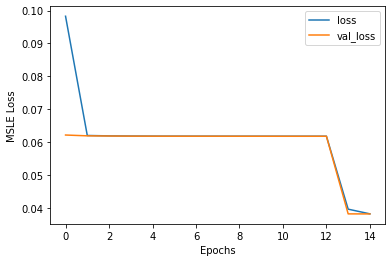

In [70]:
plt.plot(grid.history['loss'])
plt.plot(grid.history['val_loss'])
#plt.plot(grid.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss','val_loss'])#,'accuracy'])
plt.show()  

### Detect Anomalies on test data  
- Data points with higher reconstruction loss are considered anomalies. 
- To calculate the reconstruction loss on test data, predict the test data and calculate the root mean square error between the test data and the reconstructed test data. 

#### 1. Predictions and Computing Reconstruction Error using RMSE   

In [71]:
# to identify the reconstruction error between the Decoder and encoder 
test_x_predictions = model.predict(x_good_test)#,verbose=1)
mse = np.mean(np.power(x_good_test - test_x_predictions, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,'A': test_y}, index=test_y.index)  
error_df.head() 

,Reconstruction_error,A
Timestamp,,
2015-12-27 12:18:37,0.366179,0.0
2015-12-25 18:33:26,0.339119,0.0
2015-12-28 09:54:50,0.444388,0.0
2015-12-23 23:41:24,0.447807,0.0
2015-12-25 21:55:27,0.435591,0.0


In [72]:
# find the maximum RMSE values using reconstruction error 
maxValues = error_df.max()
 
print(maxValues)  

Reconstruction_error    1.146012
A                       0.000000
dtype: float64


In [75]:
# finding the number of anomalies using highest reconstruction Error 
outliers = error_df.index[error_df.Reconstruction_error >1.1].tolist()  
number_of_outliers = len(outliers) 
print("Number of elements in the anomalies: ", number_of_outliers)  

Number of elements in the anomalies:  51


#### Calculate RMSE and MAE stastical method  

In [76]:
# Define a function to calculate MAE and RMSE
errors = test_x_predictions - x_good_test
mse = np.square(errors).mean()
rmse = np.sqrt(mse)
mae = np.abs(errors).mean()

print('The performance  of autoencoder'+ ':') 
print('')
print('Mean Absolute Error: {:.4f}'.format(mae)) 
print('Mean Square Error:{:.4f}' .format(mse))
print('Root Mean Square Error: {:.4f}'.format(rmse))
print('')   

The performance  of autoencoder:

Mean Absolute Error: 0.2451
Mean Square Error:0.4212
Root Mean Square Error: 0.6490



#### For HAI data set 

In [121]:
# import data set from the local driver 

# df1=pd.read_csv('train1.csv')
#df1=pd.read_csv('train1_20.csv')
df1=pd.read_csv('train1_20.csv', sep=';' )# 09 month 
df2=pd.read_csv('train2_20.csv', sep=';' ) # 11 month 
# df3=pd.read_csv('test1_20.csv', sep=';' ) # 10 month 
# df4=pd.read_csv('test2_20.csv', sep=';' ) # 11 month 

frames = [df1,df2] 
df_concat=pd.concat(frames) 
print("The dataset has {} records".format(len(df_concat)))
df_concat.head(5)

# df1.head()  

The dataset has 550800 records


,time,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,...,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack,attack_P1,attack_P2,attack_P3
0,2019-09-11 20:00:00,0.0983,1.0702,399.2321,1110.3986,32.0,0.0,28.9981,35.7395,0.0,...,-0.0004,330.6568,328.9388,50.9871,9973.0,27629.0,0,0,0,0
1,2019-09-11 20:00:01,0.0983,1.0699,399.2321,1110.3986,32.0,0.0,29.9914,35.7388,0.0,...,-0.0012,330.2228,329.3728,50.9871,9973.0,27629.0,0,0,0,0
2,2019-09-11 20:00:02,0.0983,1.0703,399.2321,1110.3986,32.0,0.0,27.0122,35.7399,0.0,...,0.0018,332.0493,329.7526,50.9871,9973.0,27629.0,0,0,0,0
3,2019-09-11 20:00:03,0.0983,1.0719,399.2321,1110.3986,32.0,0.0,32.9705,35.7452,0.0,...,0.0033,331.5249,331.0547,50.9871,9973.0,27629.0,0,0,0,0
4,2019-09-11 20:00:04,0.0983,1.0710,399.2321,1110.3986,32.0,0.0,30.9843,35.7422,0.0,...,0.0015,333.1706,331.1631,50.9871,9973.0,27629.0,0,0,0,0


In [122]:
df_concat.shape 

(550800, 64)

In [123]:
# drop the columns that are under attack in each stage. 
df1=df_concat.drop(['attack_P1','attack_P2','attack_P3'],axis=1)#, inplace=True)   

In [124]:
# a Timestamp as index 
df1= df1.set_index('time') 
df1.head()  

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,P1_FCV01Z,...,P4_HT_PO,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack
time,,,,,,,,,,,,,,,,,,,,,
2019-09-11 20:00:00,0.0983,1.0702,399.2321,1110.3986,32.0,0.0,28.9981,35.7395,0.0,0.2838,...,57.8704,0,395.0195,-0.0004,330.6568,328.9388,50.9871,9973.0,27629.0,0
2019-09-11 20:00:01,0.0983,1.0699,399.2321,1110.3986,32.0,0.0,29.9914,35.7388,0.0,0.2838,...,58.4853,0,398.3109,-0.0012,330.2228,329.3728,50.9871,9973.0,27629.0,0
2019-09-11 20:00:02,0.0983,1.0703,399.2321,1110.3986,32.0,0.0,27.0122,35.7399,0.0,0.2914,...,59.2629,0,397.8768,0.0018,332.0493,329.7526,50.9871,9973.0,27629.0,0
2019-09-11 20:00:03,0.0983,1.0719,399.2321,1110.3986,32.0,0.0,32.9705,35.7452,0.0,0.2762,...,59.8235,0,398.6364,0.0033,331.5249,331.0547,50.9871,9973.0,27629.0,0
2019-09-11 20:00:04,0.0983,1.0710,399.2321,1110.3986,32.0,0.0,30.9843,35.7422,0.0,0.2838,...,60.3118,0,401.2406,0.0015,333.1706,331.1631,50.9871,9973.0,27629.0,0


None


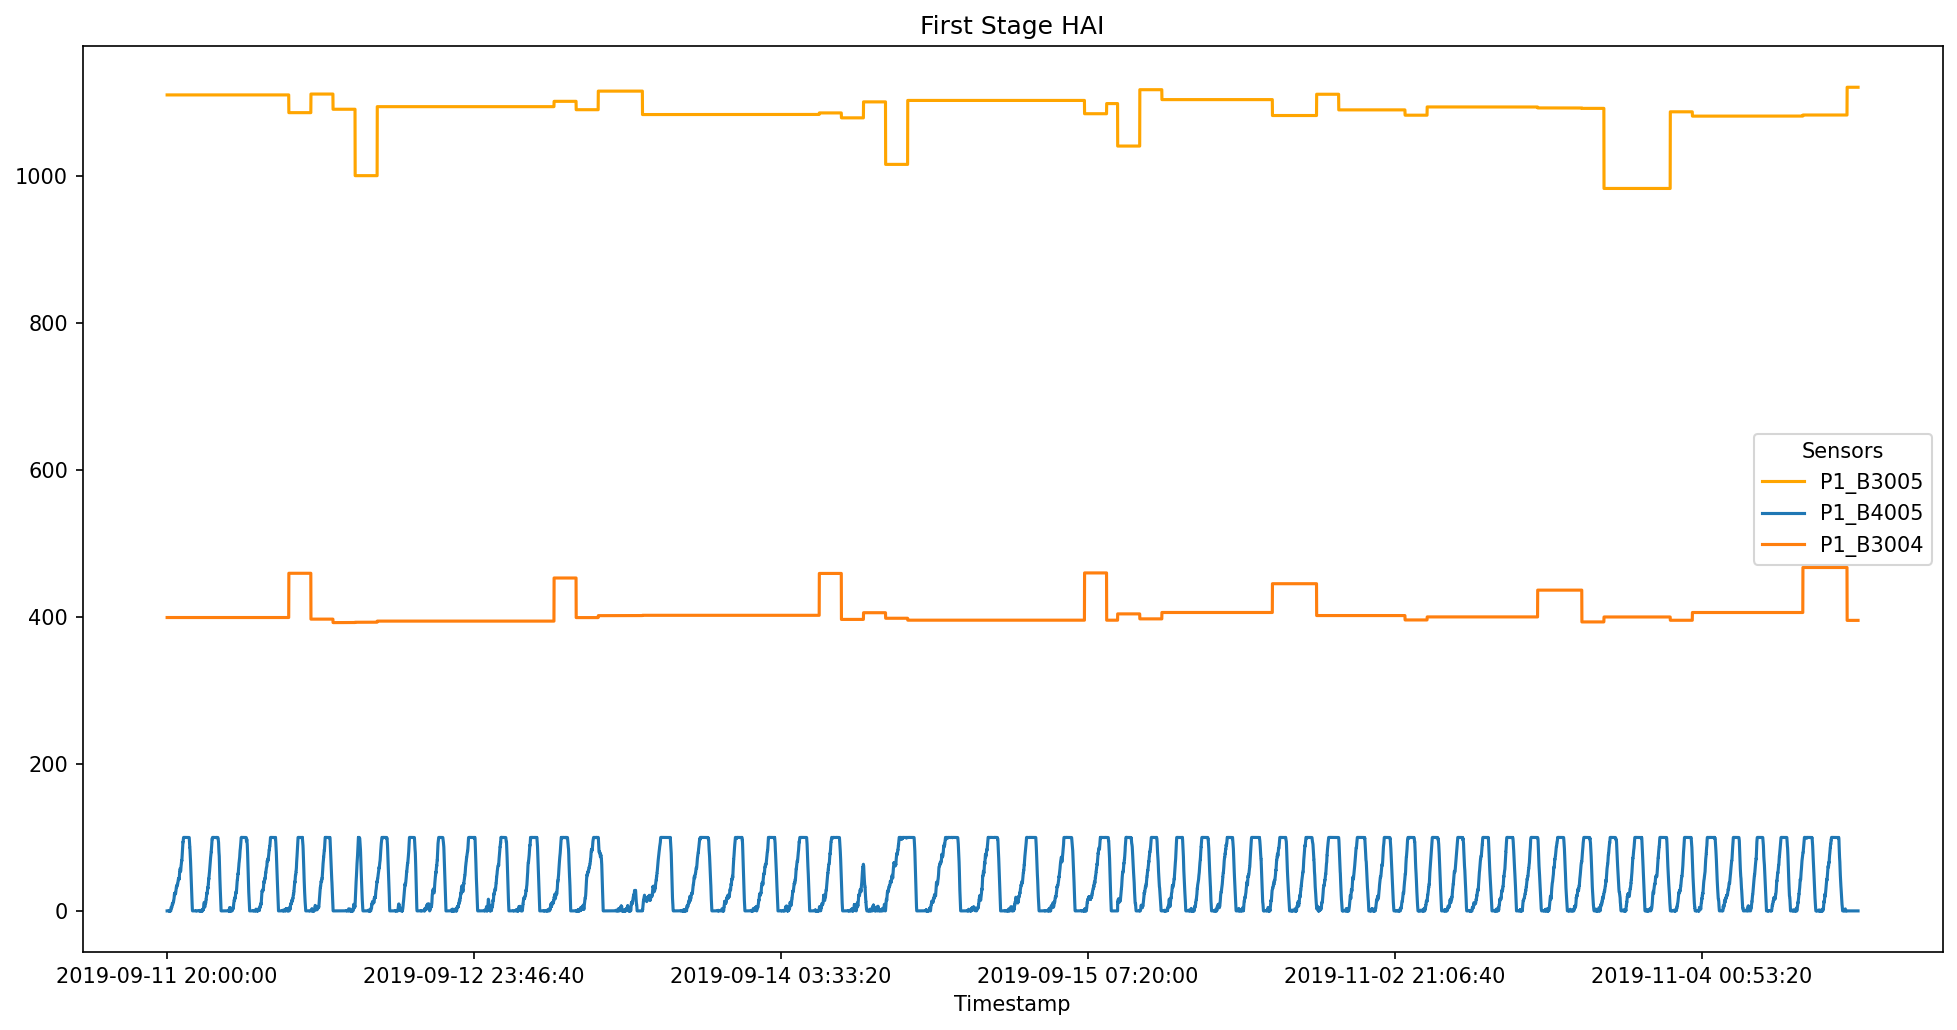

In [125]:
# Visualizing The first stage with respect to time series  
def plot (): 
    plt.figure(figsize=(16, 8), dpi=150) 
    df1['P1_B3005'].plot(label='P1_B3005', color='orange') 
    df1['P1_B4005'].plot(label='P1_B4005')
    df1['P1_B3004'].plot(label='P1_B3004') 
    # adding title to the plot 
    plt.title('First Stage HAI') 
    # adding Label to the x-axis 
    plt.xlabel('Timestamp') 
    # adding legend to the curve 
    plt.legend(title='Sensors')
    
print (plot ())  

In [127]:
# looking the distribution of the data between attack and normal

print(df1.groupby('attack')['attack'].count())   

attack
0    550024
1       776
Name: attack, dtype: int64


#### Visualize the dataset 
-  Plotting the number of normal and Attack transactions in the dataset. 

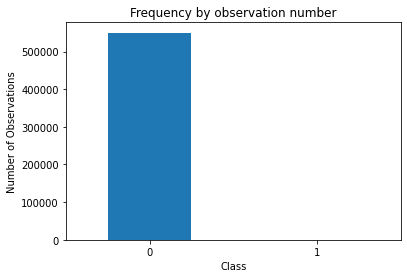

In [128]:
#Visualizing the imbalanced dataset
count_classes = pd.value_counts(df1['attack'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(len(df1['attack'].unique())))#, df1.A.unique()))
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");   

In [129]:
#Count 1 unique values in each columns
df2=df1.nunique().reset_index()
df2.columns = ['feature','number Of unique']
df2[df2['number Of unique']==1] 


,feature,number Of unique
25,P1_PCV02D,1
32,P2_Auto,1
33,P2_Emgy,1
34,P2_On,1
37,P2_TripEx,1
45,P3_LH,1
46,P3_LL,1
51,P4_HT_PS,1


In [143]:
# drop the time stamp cols 
#df1= df1.drop('P2_Auto','P2_Emgy','P2_On','P2_TripEx','P3_LH','P3_LL','P4_HT_PS', axis=0) 

# drop two columns name is 'C' and 'D'
df1.drop(['P2_Auto','P2_Emgy','P2_On','P2_TripEx','P3_LH','P3_LL','P4_HT_PS'], axis=1) 

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,P1_FCV01Z,...,P4_HT_LD,P4_HT_PO,P4_LD,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack
time,,,,,,,,,,,,,,,,,,,,,
2019-09-11 20:00:00,0.0983,1.0702,399.2321,1110.3986,32.0000,0.0,28.9981,35.7395,0.0,0.2838,...,64.4604,57.8704,395.0195,-0.0004,330.6568,328.9388,50.9871,9973.0,27629.0,0
2019-09-11 20:00:01,0.0983,1.0699,399.2321,1110.3986,32.0000,0.0,29.9914,35.7388,0.0,0.2838,...,64.7208,58.4853,398.3109,-0.0012,330.2228,329.3728,50.9871,9973.0,27629.0,0
2019-09-11 20:00:02,0.0983,1.0703,399.2321,1110.3986,32.0000,0.0,27.0122,35.7399,0.0,0.2914,...,64.9450,59.2629,397.8768,0.0018,332.0493,329.7526,50.9871,9973.0,27629.0,0
2019-09-11 20:00:03,0.0983,1.0719,399.2321,1110.3986,32.0000,0.0,32.9705,35.7452,0.0,0.2762,...,65.1620,59.8235,398.6364,0.0033,331.5249,331.0547,50.9871,9973.0,27629.0,0
2019-09-11 20:00:04,0.0983,1.0710,399.2321,1110.3986,32.0000,0.0,30.9843,35.7422,0.0,0.2838,...,65.4369,60.3118,401.2406,0.0015,333.1706,331.1631,50.9871,9973.0,27629.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-04 14:59:55,0.1001,1.5194,395.3508,1120.8154,29.4139,0.0,33.9638,33.4685,0.0,0.2609,...,73.0686,72.1752,439.8148,-0.0007,366.9524,362.7749,0.0000,10026.0,27548.0,0
2019-11-04 14:59:56,0.1001,1.5220,395.3508,1120.8154,29.4139,0.0,35.9501,33.4723,0.0,0.2609,...,73.1409,72.3018,441.8765,-0.0007,365.7950,363.7876,0.0000,10026.0,27549.0,0
2019-11-04 14:59:57,0.1001,1.5235,395.3508,1120.8154,29.4139,0.0,36.9430,33.4833,0.0,0.2609,...,73.1916,72.3741,440.6286,-0.0003,367.0790,364.0950,0.0000,10026.0,27547.0,0


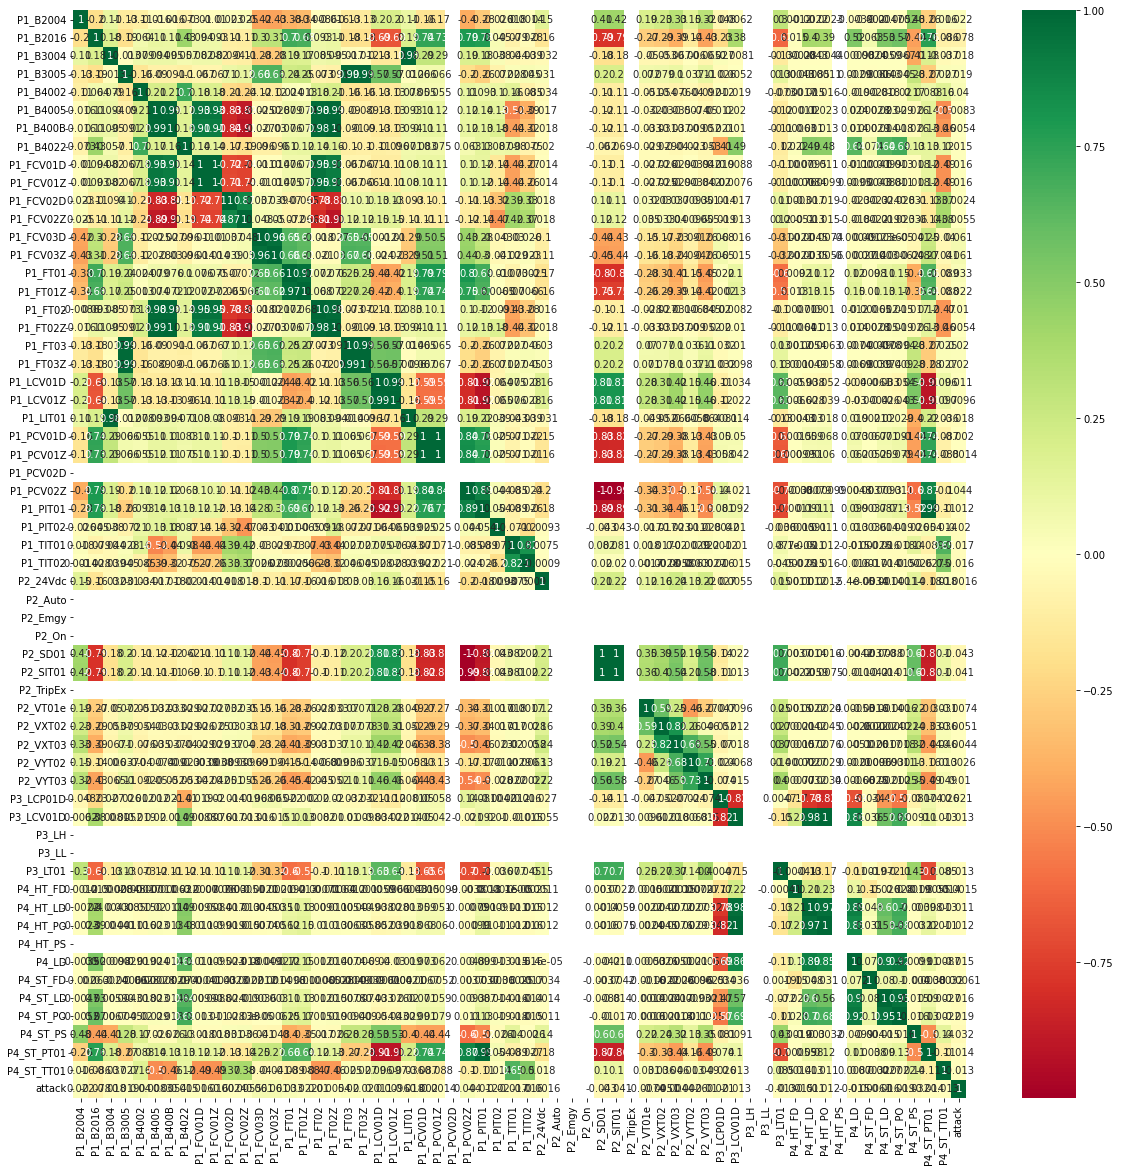

In [97]:
import seaborn as sns


#get correlations of each features in dataset
c = df1.corr()
top_corr_features = c.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df1[top_corr_features].corr(),annot=True,cmap="RdYlGn")   

In [98]:
c=c.attack.sort_values(ascending=False).head(42).keys().drop('attack') # corelation
print(c)

Index(['P1_FCV03D', 'P1_FCV03Z', 'P1_PCV02Z', 'P1_B4002', 'P1_FT01',
       'P1_FT01Z', 'P1_B2004', 'P3_LCP01D', 'P1_FT03', 'P1_FT03Z', 'P1_B3005',
       'P1_FCV01D', 'P1_FCV01Z', 'P1_B4022', 'P1_LCV01D', 'P1_FT02',
       'P1_LCV01Z', 'P1_B4005', 'P1_FCV02Z', 'P1_B400B', 'P1_FT02Z',
       'P2_VYT02', 'P1_FCV02D', 'P4_ST_FD', 'P1_PCV01Z', 'P4_HT_FD',
       'P2_24Vdc', 'P1_PCV01D', 'P2_VXT03', 'P2_VXT02', 'P2_VT01e', 'P2_VYT03',
       'P4_HT_LD', 'P1_PIT01', 'P4_HT_PO', 'P3_LCV01D', 'P3_LT01',
       'P4_ST_TT01', 'P4_ST_PT01', 'P4_LD', 'P4_ST_LD'],
      dtype='object')


In [99]:
# Select Multiple Columns
df2 = df1.loc[:, ['P1_FCV03D', 'P1_FCV03Z', 'P1_PCV02Z', 'P1_B4002', 'P1_FT01',
       'P1_FT01Z', 'P1_B2004', 'P3_LCP01D', 'P1_FT03', 'P1_FT03Z',
       'P1_B3005', 'P1_FCV01D', 'P1_FCV01Z', 'P1_B4022', 'P1_LCV01D',
       'P1_FT02', 'P1_LCV01Z', 'P1_B4005', 'P1_FCV02Z', 'P1_B400B',
       'P1_FT02Z', 'P2_VYT02', 'P1_FCV02D', 'P4_ST_FD', 'P1_PCV01Z', 'P4_HT_FD',
       'P2_24Vdc', 'P1_PCV01D', 'P2_VXT03', 'P2_VXT02', 'P2_VT01e', 'P2_VYT03',
       'P4_HT_LD', 'P1_PIT01', 'P4_HT_PO', 'P3_LCV01D', 'P3_LT01', 'P4_ST_TT01',
       'P4_ST_PT01', 'P4_LD', 'P4_ST_LD','attack']]

In [142]:
df2.shape 
df2.info

<bound method DataFrame.info of        feature  number Of unique
0     P1_B2004               209
1     P1_B2016             14283
2     P1_B3004               492
3     P1_B3005               497
4     P1_B4002                74
5     P1_B4005            246867
6     P1_B400B             16154
7     P1_B4022             19218
8    P1_FCV01D            229787
9    P1_FCV01Z             15136
10   P1_FCV02D             14225
11   P1_FCV02Z             12205
12   P1_FCV03D             94372
13   P1_FCV03Z              2649
14     P1_FT01              4939
15    P1_FT01Z              5354
16     P1_FT02             15938
17    P1_FT02Z             16413
18     P1_FT03              2841
19    P1_FT03Z              3017
20   P1_LCV01D            124550
21   P1_LCV01Z              3742
22    P1_LIT01              4832
23   P1_PCV01D            256610
24   P1_PCV01Z             11422
25   P1_PCV02D                 1
26   P1_PCV02Z                60
27    P1_PIT01              4025
28    P1_PI

In [102]:
#To see how the data is spread betwen Attack and Normal 
#print(df1.groupby('Normal/Attack')['Normal/Attack'].count()) 
print(df2.groupby('attack')['attack'].count())  

attack
0    550024
1       776
Name: attack, dtype: int64


#### Normalize using min Max scaler  

In [104]:
con_feats = ['P1_FCV03D', 'P1_FCV03Z', 'P1_PCV02Z', 'P1_B4002', 'P1_FT01',
       'P1_FT01Z', 'P1_B2004', 'P3_LCP01D', 'P1_FT03', 'P1_FT03Z',
       'P1_B3005', 'P1_FCV01D', 'P1_FCV01Z', 'P1_B4022', 'P1_LCV01D',
       'P1_FT02', 'P1_LCV01Z', 'P1_B4005', 'P1_FCV02Z', 'P1_B400B',
       'P1_FT02Z', 'P2_VYT02', 'P1_FCV02D', 'P4_ST_FD', 'P1_PCV01Z', 'P4_HT_FD',
       'P2_24Vdc', 'P1_PCV01D', 'P2_VXT03', 'P2_VXT02', 'P2_VT01e', 'P2_VYT03',
       'P4_HT_LD', 'P1_PIT01', 'P4_HT_PO', 'P3_LCV01D', 'P3_LT01', 'P4_ST_TT01',
       'P4_ST_PT01', 'P4_LD', 'P4_ST_LD'] 


scaler = MinMaxScaler() 
df2[con_feats] = scaler.fit_transform(df2[con_feats])
df2.head()   

,P1_FCV03D,P1_FCV03Z,P1_PCV02Z,P1_B4002,P1_FT01,P1_FT01Z,P1_B2004,P3_LCP01D,P1_FT03,P1_FT03Z,...,P4_HT_LD,P1_PIT01,P4_HT_PO,P3_LCV01D,P3_LT01,P4_ST_TT01,P4_ST_PT01,P4_LD,P4_ST_LD,attack
time,,,,,,,,,,,,,,,,,,,,,
2019-09-11 20:00:00,0.474895,0.511762,0.117579,0.875635,0.413262,0.609965,0.950413,0.084418,0.861597,0.868557,...,0.774283,0.276884,0.695151,0.706606,0.308875,0.99992,0.28169,0.611301,0.512735,0
2019-09-11 20:00:01,0.465751,0.511762,0.117579,0.875635,0.405835,0.593783,0.950413,0.080078,0.877192,0.872157,...,0.777411,0.276080,0.702544,0.714410,0.308875,0.99992,0.28169,0.623515,0.510529,0
2019-09-11 20:00:02,0.461050,0.511762,0.117579,0.875635,0.418037,0.581859,0.950413,0.076244,0.883040,0.886562,...,0.780104,0.276080,0.711894,0.721400,0.308875,0.99992,0.28169,0.621904,0.519816,0
2019-09-11 20:00:03,0.441352,0.511762,0.146877,0.875635,0.415385,0.601448,0.950413,0.072627,0.916179,0.891964,...,0.782710,0.276080,0.718634,0.728012,0.308875,0.99992,0.28169,0.624723,0.517149,0
2019-09-11 20:00:04,0.458794,0.511762,0.117579,0.875635,0.410079,0.597189,0.950413,0.068938,0.877192,0.922575,...,0.786011,0.275651,0.724505,0.734461,0.308875,0.99992,0.28169,0.634387,0.525517,0


#### Split the Data to train and Test  

In [131]:
# split the normal data with respect to test and Train 
from sklearn.model_selection import train_test_split 
x_good_train_HAI, x_good_test_HAI = train_test_split(df1, test_size=0.2, random_state=42)   

In [132]:
# min max scale the input data or Standard Scaler  
x_good_train_HAI = x_good_train_HAI[x_good_train_HAI.attack == 0] #where normal transactions 
x_good_train_HAI = x_good_train_HAI.drop(['attack'], axis=1) #drop the class columns 

test_y = x_good_test_HAI['attack'] # save the class column for the test set 
x_good_test_HAI = x_good_test_HAI.drop(['attack'], axis=1) #drop the class column 

#transform to ndarray both train and testing 
x_good_train_HAI = x_good_train_HAI.values #transform to ndarray 
x_good_test_HAI = x_good_test_HAI.values 
x_good_train_HAI.shape, x_good_test_HAI.shape#,x_good_train.shape,test_y.shape   

((440012, 59), (110160, 59))

#### import important libraries  

In [133]:
######### 
#Define the autoencoder model
#Since we're dealing with numeric values we can use only Dense layers.

from sklearn import metrics
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense  
from keras.layers import Input, Dense
from keras import regularizers 
from keras.models import Model, load_model 
import datetime  

In [134]:
model = Sequential()
# encoder 
model.add(Dense(128, input_dim=x_good_train_HAI.shape[1], activation='relu')) # Input layers 
Dropout(0.01), 
# hidden layers
model.add(Dense(32, activation='relu'))
Dropout(0.01), 
#model.add(Dense(32, activation='relu'))
#Dropout(0.01), 
#Decoder 
model.add(Dense(128, activation='relu')) ## decoder 
Dropout(0.01), 
model.add(Dense(x_good_train_HAI.shape[1])) # output layers 
model.compile(loss='msle',metrics=['accuracy'],optimizer='adam')  
model.summary()  

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               7680      
                                                                 
 dense_17 (Dense)            (None, 32)                4128      
                                                                 
 dense_18 (Dense)            (None, 128)               4224      
                                                                 
 dense_19 (Dense)            (None, 59)                7611      
                                                                 
Total params: 23,643
Trainable params: 23,643
Non-trainable params: 0
_________________________________________________________________


In [135]:
#model.fit(x_good_train,x_good_train,verbose=1,epochs=100) 
grid=model.fit(
    x_good_train_HAI,x_good_train_HAI,
    verbose=2,
    epochs=15,
    batch_size=256,
    validation_data=(x_good_test_HAI, x_good_test_HAI), 
    callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ])  
score=model.evaluate(x_good_test_HAI, x_good_test_HAI, verbose=1)
print('Test loss:', score[0]) 
print('Accuracy:', score[1])   

Epoch 1/15
1719/1719 - 10s - loss: 7.5148 - accuracy: 0.0000e+00 - val_loss: 7.1370 - val_accuracy: 0.0000e+00 - 10s/epoch - 6ms/step
Epoch 2/15
1719/1719 - 9s - loss: 7.0157 - accuracy: 0.0000e+00 - val_loss: 6.4873 - val_accuracy: 0.0000e+00 - 9s/epoch - 5ms/step
Epoch 3/15
1719/1719 - 9s - loss: 6.1064 - accuracy: 0.0000e+00 - val_loss: 5.4800 - val_accuracy: 0.0000e+00 - 9s/epoch - 5ms/step
Epoch 4/15
1719/1719 - 9s - loss: 4.2813 - accuracy: 0.0000e+00 - val_loss: 3.7340 - val_accuracy: 0.0000e+00 - 9s/epoch - 5ms/step
Epoch 5/15
1719/1719 - 9s - loss: 2.0154 - accuracy: 0.1103 - val_loss: 1.9023 - val_accuracy: 0.4206 - 9s/epoch - 5ms/step
Epoch 6/15
1719/1719 - 9s - loss: 1.9341 - accuracy: 0.7996 - val_loss: 1.9407 - val_accuracy: 0.9681 - 9s/epoch - 5ms/step
Epoch 7/15
1719/1719 - 9s - loss: 1.9117 - accuracy: 0.9877 - val_loss: 1.9094 - val_accuracy: 1.0000 - 9s/epoch - 5ms/step
Epoch 8/15
1719/1719 - 9s - loss: 1.8819 - accuracy: 1.0000 - val_loss: 1.8473 - val_accuracy: 1.0

#### Plot training and test loss 

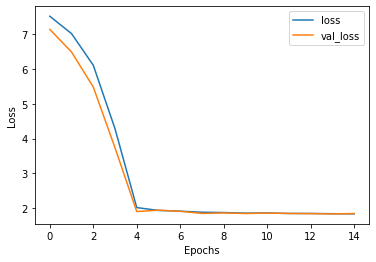

In [136]:
plt.plot(grid.history['loss'])
plt.plot(grid.history['val_loss'])
#plt.plot(grid.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','val_loss'])#,'accuracy'])
plt.show()   

### Detect Anomalies on test data  
- Anomalies are data points where the reconstruction loss is higher 
- To calculate the reconstruction loss on test data, predict the test data and calculate the mean square error between the test data and the reconstructed test data. 

#### 1. Predictions and Computing Reconstruction Error using RMSE  

In [137]:
# to identify the reconstruction error between the Decoder and encoder 
test_x_predictions_HAI = model.predict(x_good_test_HAI)#,verbose=1)
mse = np.mean(np.power(x_good_test_HAI - test_x_predictions_HAI, 2), axis=1)
error_df_HAI = pd.DataFrame({'Reconstruction_error': mse,'attack': test_y}, index=test_y.index)  
error_df_HAI.head() 

,Reconstruction_error,attack
time,,
2019-09-15 07:15:05,176634.876948,0
2019-09-12 14:06:22,194993.156989,0
2019-09-13 17:05:24,97473.586616,0
2019-09-14 22:47:33,77721.931757,0
2019-11-03 17:19:29,223452.797742,0


In [138]:
# find the maximum of each column using reconstruction error 
maxValues_HAI = error_df_HAI.max()
 
print(maxValues_HAI)  

Reconstruction_error    1.611230e+06
attack                  1.000000e+00
dtype: float64


In [139]:
# finding the number of anomalies using highest reconstruction Error 

outliers = error_df.index[error_df.Reconstruction_error > 0.00016].tolist()  
number_of_outliers = len(outliers) 
print("Number of elements in the anomalies: ", number_of_outliers)    

Number of elements in the anomalies:  97421


#### Calculate RMSE and MAE stastical method 

In [140]:
# Define a function to calculate MAE and RMSE
errors_HAI = test_x_predictions_HAI - x_good_test_HAI
mse = np.square(errors_HAI).mean()
rmse = np.sqrt(mse)
mae = np.abs(errors_HAI).mean()

print('The performance  of autoencoder'+ ':') 
print('')
print('Mean Absolute Error: {:.4f}'.format(mae)) 
print('Mean Square Error:{:.4f}' .format(mse))
print('Root Mean Square Error: {:.4f}'.format(rmse))
print('')     

The performance  of autoencoder:

Mean Absolute Error: 269.0478
Mean Square Error:270219.4241
Root Mean Square Error: 519.8263

